<a href="https://colab.research.google.com/github/JONAHKYAGABA/MICROEXPRESSIONS1/blob/main/dataset_balck_race_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [ ]:
#defining  important the attributes
IMAGE_SIZE=224
CHANNELS=3
BATCH_SIZE=2
EPOCHS=25

In [ ]:
#load the dataset from your device directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/microtests (1)/New folder",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 29 files belonging to 7 classes.


In [ ]:
# Get class labels for the dataset
class_labels = dataset.class_names

# Create a dictionary to map class indices to class labels
class_to_label = {i: label for i, label in enumerate(class_labels)}

In [ ]:

model = tf.keras.models.load_model('/content/drive/MyDrive/models/mobilenetmodel.h5')

1/1 [==============================] - 1s 960ms/step


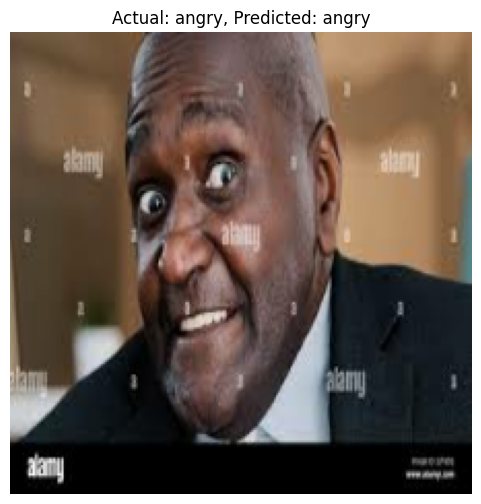

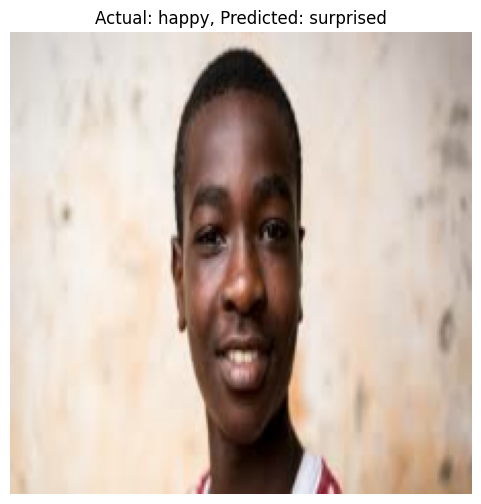

1/1 [==============================] - 0s 30ms/step


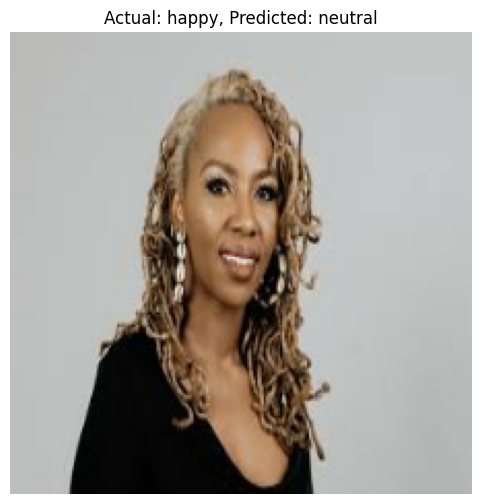

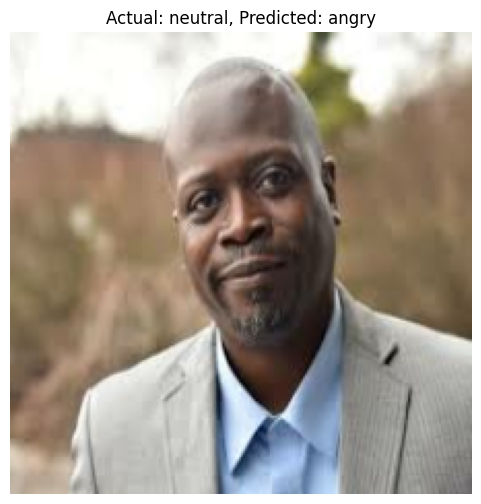

1/1 [==============================] - 0s 37ms/step


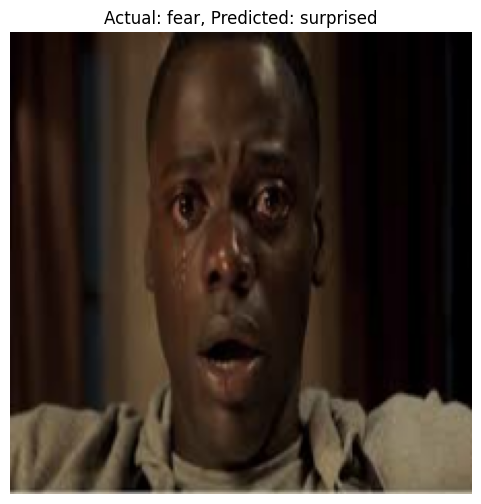

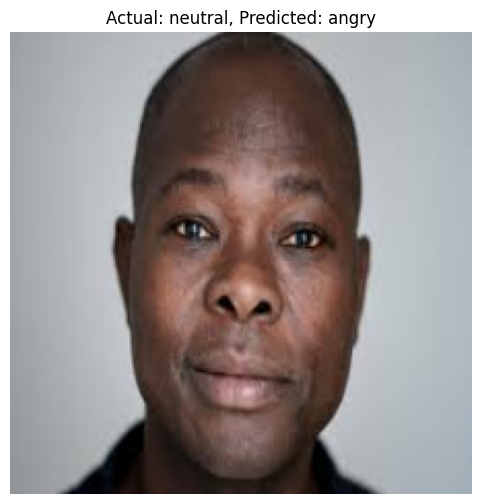

1/1 [==============================] - 0s 25ms/step


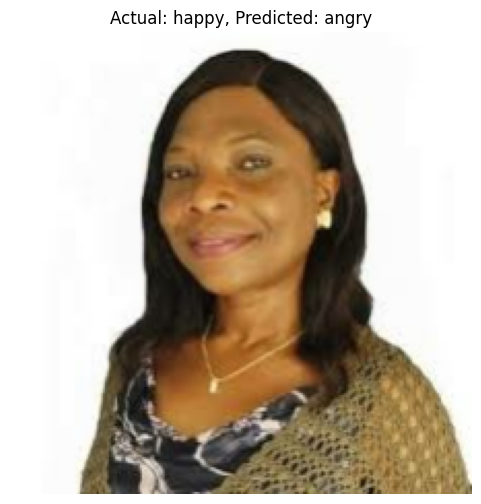

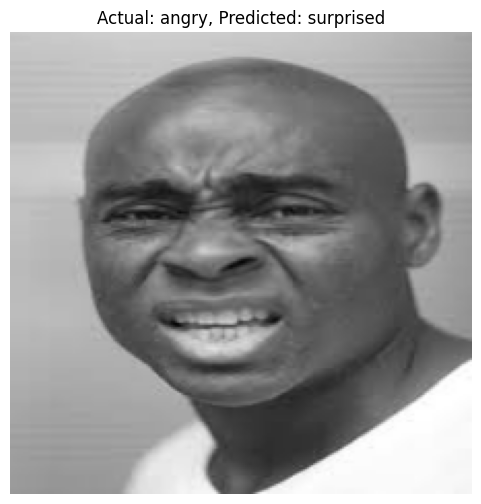

1/1 [==============================] - 0s 32ms/step


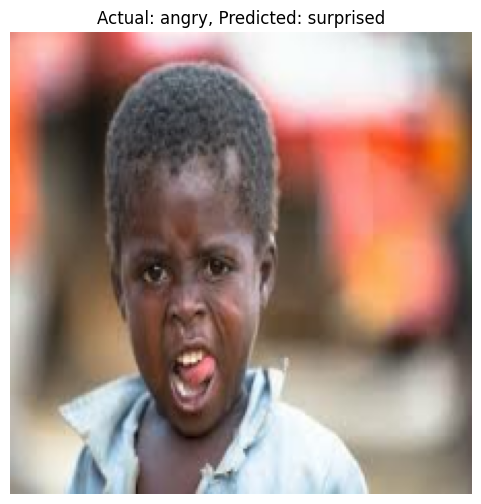

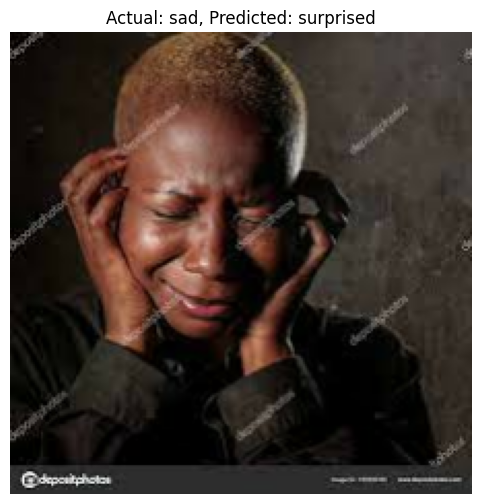

1/1 [==============================] - 0s 39ms/step


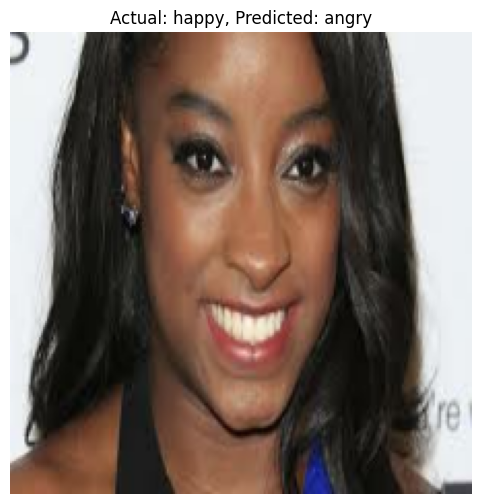

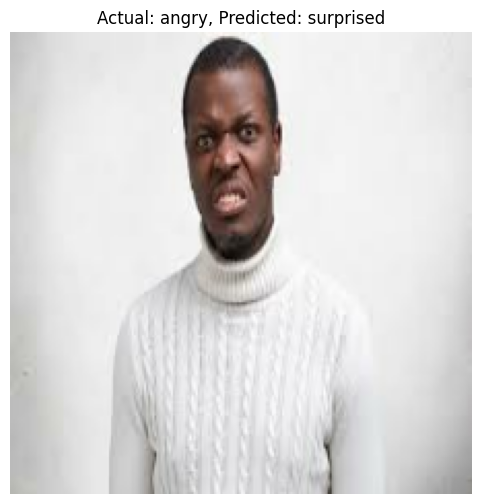

1/1 [==============================] - 0s 27ms/step


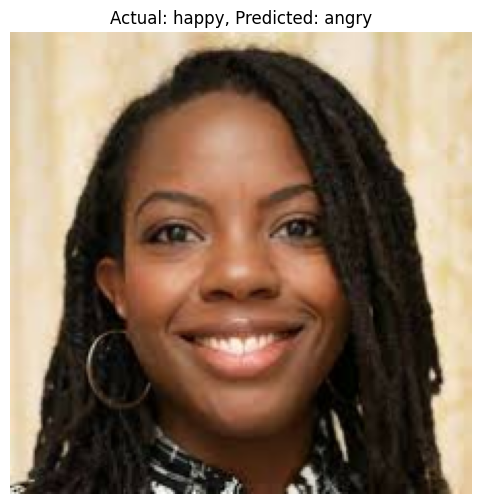

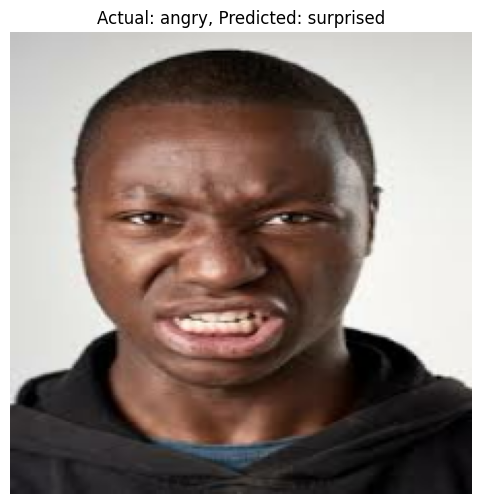

1/1 [==============================] - 0s 38ms/step


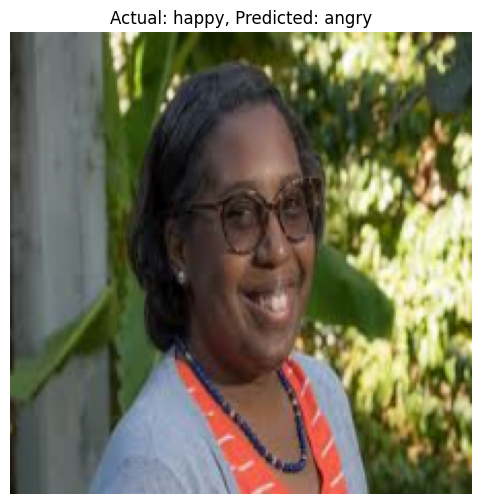

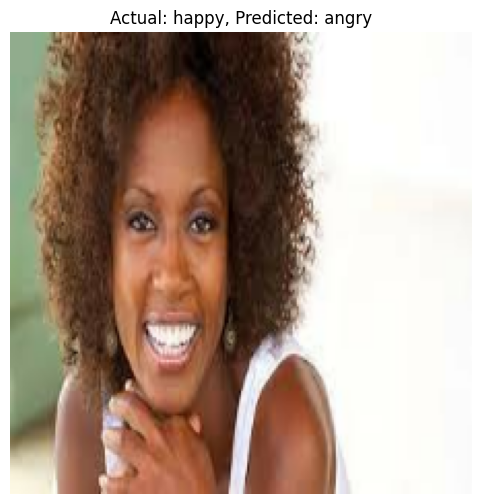

1/1 [==============================] - 0s 42ms/step


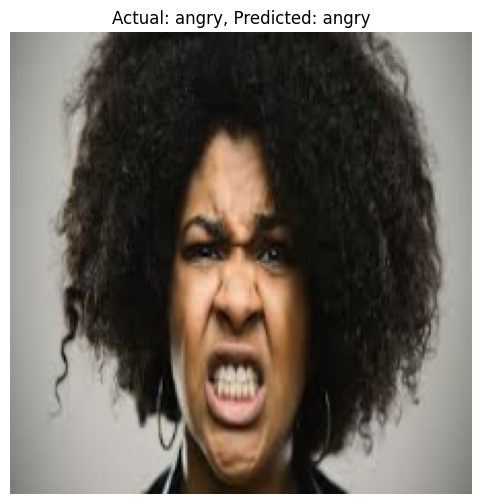

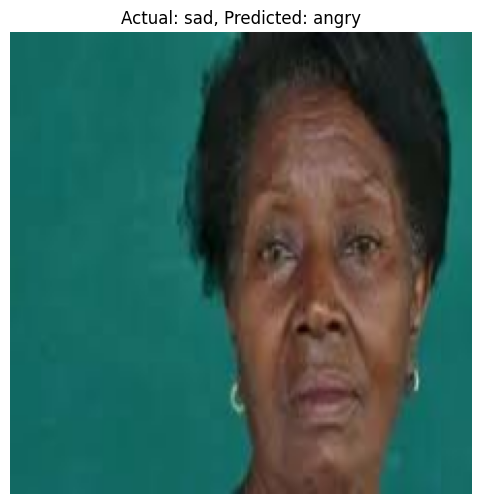

1/1 [==============================] - 0s 36ms/step


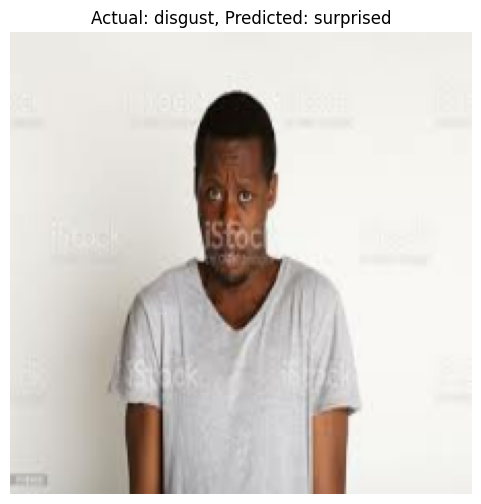

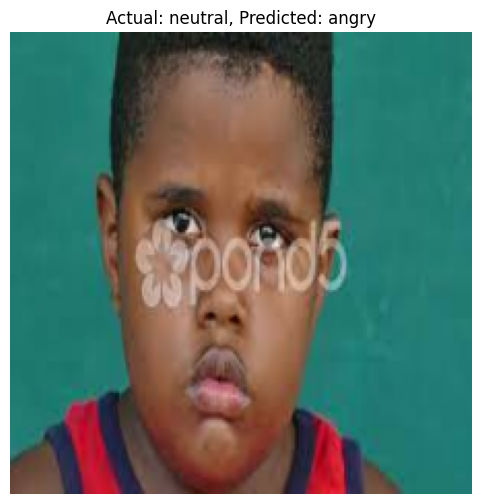

1/1 [==============================] - 0s 53ms/step


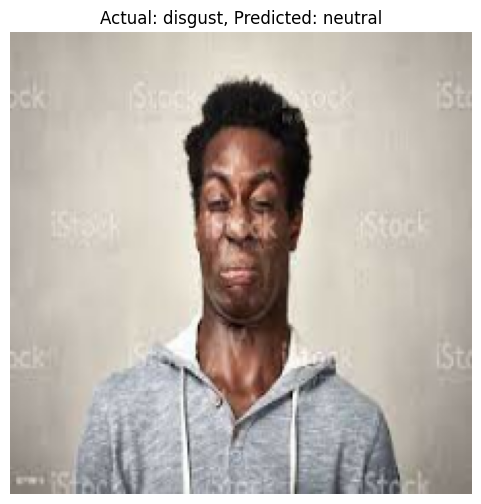

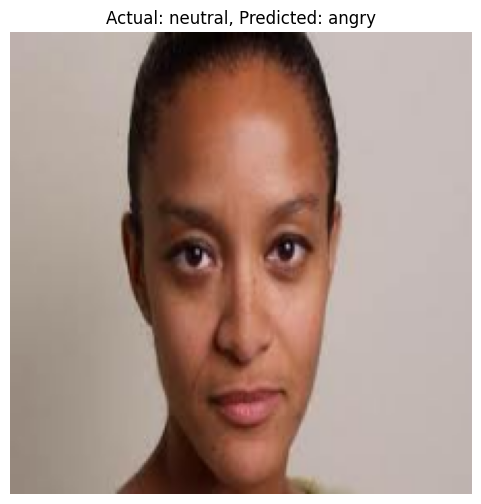

1/1 [==============================] - 0s 54ms/step


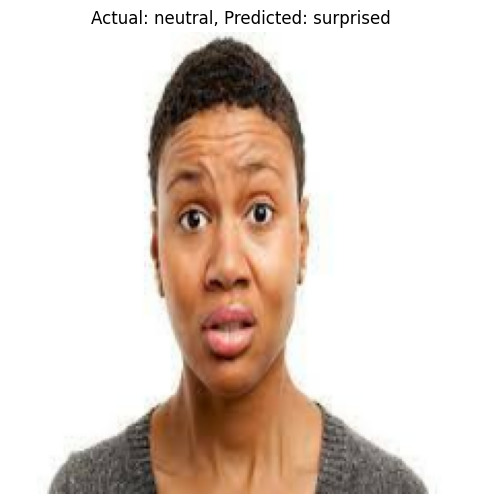

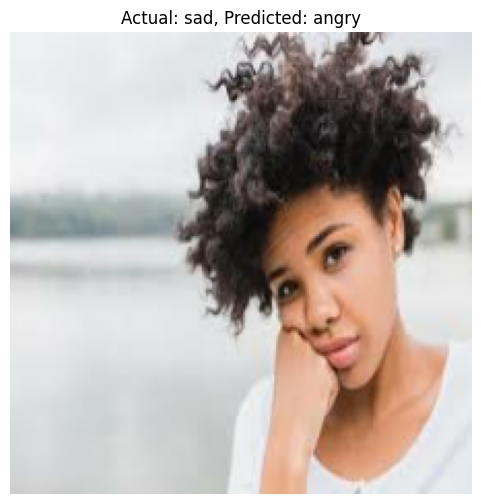

1/1 [==============================] - 0s 40ms/step


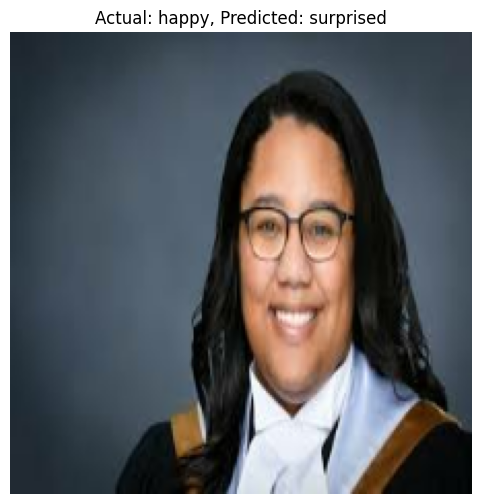

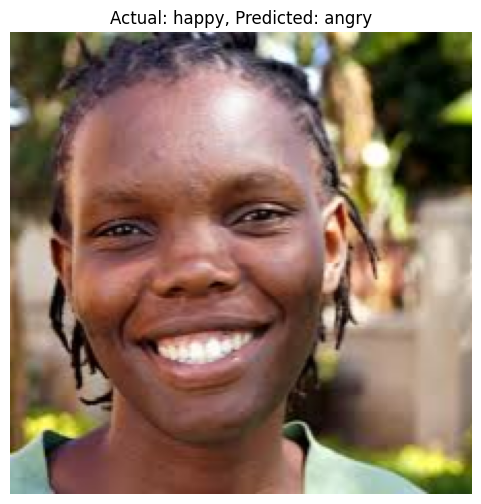

1/1 [==============================] - 0s 39ms/step


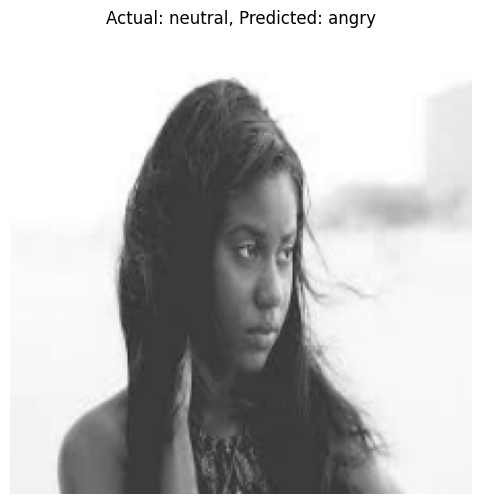

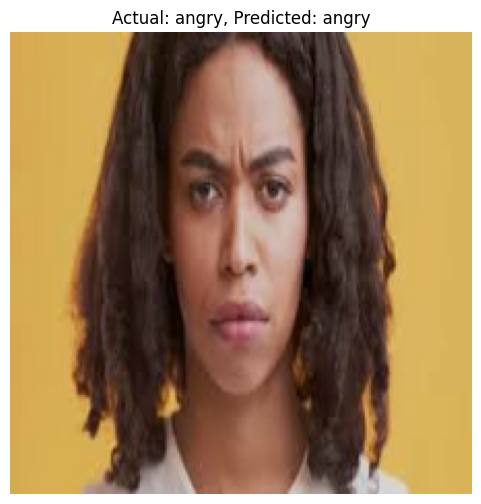

1/1 [==============================] - 0s 45ms/step


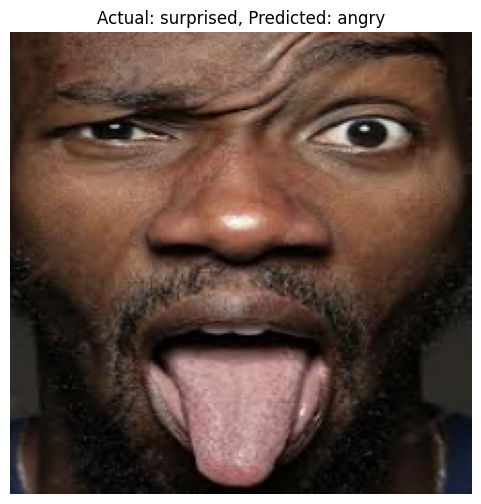

In [ ]:
# Iterate through the dataset and make predictions
for images, labels in dataset:
    predictions = model.predict(images)

    # Plot each image and its predicted label
    for i in range(len(images)):
        plt.figure(figsize=(6, 6))
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class_index = tf.argmax(predictions[i]).numpy()  # Convert tensor to Python integer
        predicted_class_label = class_to_label[predicted_class_index]
        actual_class_label = class_labels[labels[i]]
        plt.title(f"Actual: {actual_class_label}, Predicted: {predicted_class_label}")
        plt.axis("off")
        plt.show()


1/1 [==============================] - 0s 24ms/step


<Figure size 1000x800 with 0 Axes>

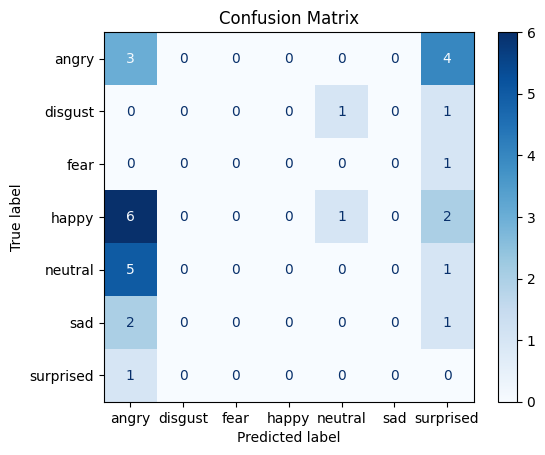

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define constants
IMAGE_SIZE = (128, 128)  # Adjust this size as needed
BATCH_SIZE = 32

# Load the dataset from your device directory


# Assuming there are seven classes, including one with no images
class_labels = dataset.class_names

# Collect true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in dataset:
    predictions = model.predict(images)
    predicted_class_indices = tf.argmax(predictions, axis=1)

    # Iterate through each true label and its corresponding predicted label
    for true_label, predicted_label in zip(labels.numpy(), predicted_class_indices.numpy()):
        # Check if the true label corresponds to the class with no images
        if true_label >= len(class_labels):
            # Replace it with a placeholder label or skip it
            continue
        true_labels.append(true_label)
        predicted_labels.append(predicted_label)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix with labels
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()
